In [171]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [172]:
import numpy as np
import pandas as pd
# Reading the data
import io
from google.colab import files
uploaded = files.upload()


Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv


gender: The gender of the student (M for male).
NationalITy: The nationality of the student (KW for Kuwait).

PlaceofBirth: The place of birth of the student (KuwaIT).

StageID: The academic stage of the student (lowerlevel).

GradeID: The grade level of the student (G-04).

SectionID: The section identifier for the student (A).

Topic: The subject or topic of study (IT).

Semester: The semester during which the data was collected (F for Fall).

Relation: The relationship of the student to the guardian (Father).

raisedhands: The number of times the student raised their hands in class.

VisITedResources: The number of times the student visited online resources.

AnnouncementsView: The number of announcements viewed by the student.

Discussion: The number of discussion posts the student participated in.

ParentAnsweringSurvey: Indicates whether the parent answered a survey (Yes or No).

ParentschoolSatisfaction: The parent's satisfaction with the school (Good or Bad).

StudentAbsenceDays: The number of days the student was absent (Under-7 or Above-7).

Class: The final class label or grade of the student (M or L).

In [209]:
df = pd.read_csv(io.BytesIO(uploaded['xAPI-Edu-Data.csv']))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [175]:
# Create a countplot using px
fig = px.histogram(df, x='Class', color='Class', title='Class Distribution')
fig.update_layout(height = 400, width = 600)

# Show the plot
fig.show()


In [176]:
# Create a countplot using px
fig = px.histogram(df, x='Class', color='gender',barmode = "group", title='Class Distribution')
fig.update_layout(height = 400, width = 600)

# Show the plot
fig.show()


In [17]:
# Create a countplot using px
fig = px.histogram(df, x='Class', color='StudentAbsenceDays',barmode = "group", title='Class Distribution')
fig.update_layout(height = 400, width = 600)

# Show the plot
fig.show()


In [22]:
# Create a countplot using px
fig = px.histogram(df, x='Class', color='NationalITy',barmode = "group", title='Class Distribution')
fig.update_layout(height = 400, width = 600)

# Show the plot
fig.show()


In [19]:
fig = px.scatter_matrix(df,
                        dimensions=['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion'],
                        color='Class',
                        title='Scatter Matrix of Student Performance Metrics by Class')
fig.update_layout(height = 1000, width = 1500)

# Show the plot
fig.show()

In [210]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [211]:

df['gender'] = le.fit_transform(df['gender'])
df.info()
#m
#1 M #0 F

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    int64 
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [212]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M



Use One-Hot Encoding when dealing with categorical data without any ordinal relationship and when you want to prevent the model from assuming any ordinal relationship. It’s particularly useful for algorithms that expect input features to be on a similar scale.
Use Label Encoding when dealing with ordinal data where the categories have a meaningful order or ranking, and for algorithms that can handle ordinal relationships, such as tree-based methods.

In [213]:
nat = pd.get_dummies(df,columns= ['NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester',
              'Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],drop_first=True)

In [214]:
#Drop useless columns & columns we need to replace with variables above
df.drop(['NationalITy','PlaceofBirth','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester',
              'Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'],axis=1,inplace=True)

In [215]:
# Concatenating the variables we created above
df = pd.concat([df,nat],axis=1)


In [216]:
df = df.T.drop_duplicates().T

In [217]:
df1 = df.copy()
target = df['Class']
features = df.drop('Class',axis=1)



In [218]:
scaler = StandardScaler()
scaler.fit(features)
scaled = scaler.transform(features)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size=0.2, random_state=42)

In [220]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [221]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(384, 55)
(384,)
(96, 55)
(96,)


In [265]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 5, 15, 25, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 5, 15, 25, 20,
                                                      30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, verbose=2)

In [266]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': False}

In [271]:
rf = RandomForestClassifier( ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features='auto')

In [272]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(criterion='entropy', max_depth=25, max_features='auto',
                       min_samples_leaf=2, min_samples_split=5)

In [274]:
accuracy_score(y_train, rf.predict(X_train))

0.9557291666666666

In [273]:
#test_accuracy
accuracy_score(y_test, rf.predict(X_test))

0.84375

In [244]:
param_dist = {
    'max_depth': [None, 5, 15, 25, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(max_depth=30,
                                                    min_samples_leaf=2,
                                                    min_samples_split=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 15, 25, 10, 20,
                                                      30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [245]:
random_search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'criterion': 'gini'}

In [246]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_leaf=2, min_samples_split=10,)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10)

In [288]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

[[ 0.7574764  -1.5212795  -1.56747118 ... -1.13389342 -1.24627103
  -1.23007683]
 [ 0.7574764   0.85292474  0.88369238 ...  0.8819171   0.80239368
  -1.23007683]
 [ 0.7574764   1.24320489  1.00473749 ...  0.8819171   0.80239368
   0.81295735]
 ...
 [ 0.7574764  -0.87081258 -1.56747118 ... -1.13389342  0.80239368
  -1.23007683]
 [ 0.7574764   1.04806482  1.00473749 ...  0.8819171   0.80239368
  -1.23007683]
 [-1.32017315 -1.4562328  -1.47668735 ... -1.13389342 -1.24627103
  -1.23007683]]


In [287]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8958333333333334
0.8333333333333334


#Confusion Matrix Random Forest

<Axes: >

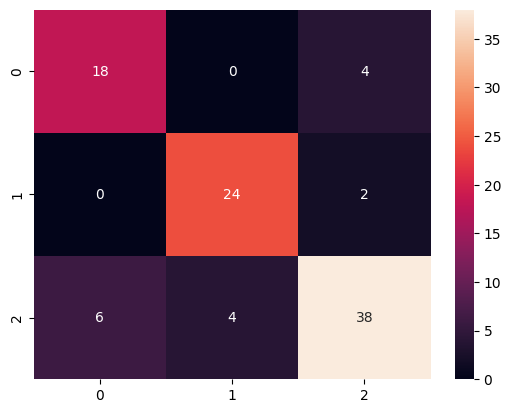

In [256]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)


#Confusion Matrix for DecsionTree

<Axes: >

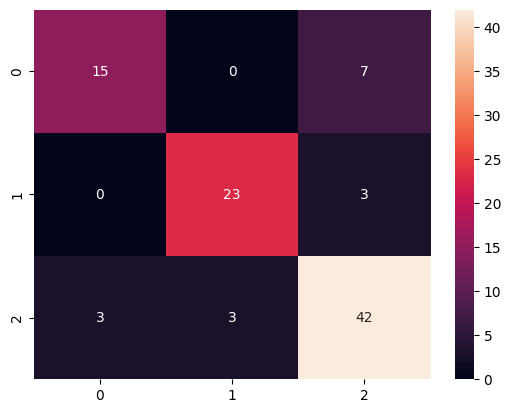

In [258]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot=True)

<Axes: >

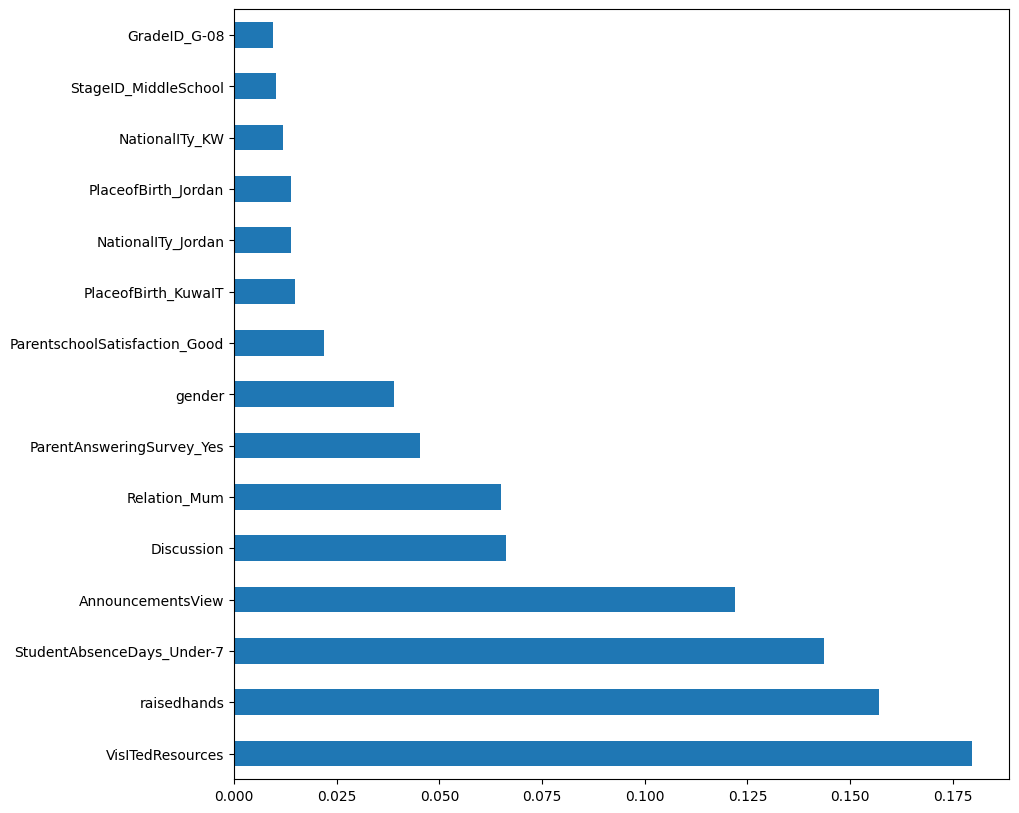

In [250]:
# Show which features has the most effect on our results so we can modify and tune our features
# I used Random Forest Classifier to determine the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
importance = pd.Series(rf.feature_importances_,index=features.columns)
importance.nlargest(15).plot(kind='barh')

# ACCURACY

1. Random forest got an accuracy of 84.3%
2. Decision Tree got an accuracy of 83.3%